In [1]:
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline

# Part 1
### Compute the trajectory for this desired motion profile using a polynomial function of degree four.


In [2]:
def traj4_coef(known_pos,known_vel):
    A = []
    b = []

    for p in known_pos:
      A.append([p[0]**4,p[0]**3,p[0]**2,p[0],1])
      b.append(p[1])

    for p in known_vel:
      A.append([4*p[0]**3,3*p[0]**2,2*p[0],1,0])
      b.append(p[1])

    A = np.array(A)
    b = np.array(b)

    coef = np.linalg.pinv(A) @ b
    return coef,A,b

### Calculating the coefficients of the polynomials for X and Y trajectory.
#### Here we assume that the robot reaches the cookie at t=1.5 and also stops there, for additional constraints while solving for the polynomial coefficients.


In [3]:
known_xpos = [(0,3),(5,9),(1.5,1)]
known_xvel = [(0,0),(1.5,0),(5,0)]

known_ypos = [(0,0),(5,5),(1.5,2.5)]
known_yvel = [(0,0),(1.5,0),(5,0)]

x_coef,_,_ = traj4_coef(known_xpos,known_xvel)
y_coef,_,_ = traj4_coef(known_ypos,known_yvel)


### Plotting the trajectory and waypoints (start, end, cookie).

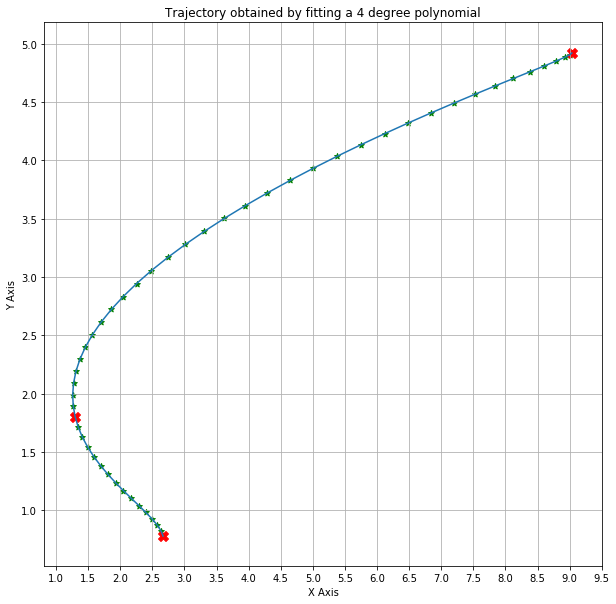

In [4]:
ts = np.arange(0,5.1,0.1)
x = []
y = []
for t in ts:
  tt = [t**4,t**3,t**2,t,1]
  x.append(np.dot(x_coef,tt))
  y.append(np.dot(y_coef,tt))

xx = []
yy = []
known_pos = [0,1.5,5]
for t in known_pos:
  tt = [t**4,t**3,t**2,t,1]
  xx.append(np.dot(x_coef,tt))
  yy.append(np.dot(y_coef,tt))


fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.set_xticks(np.arange(0, 10, 0.5))
ax.set_yticks(np.arange(0, 10, 0.5))
plt.scatter(x, y,marker='*',c='green')
plt.plot(x,y)
plt.scatter(xx,yy,marker = 'X',c = 'red',s=100)
plt.grid()
plt.title("Trajectory obtained by fitting a 4 degree polynomial")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.show()

### Plotting the velocity profiles.

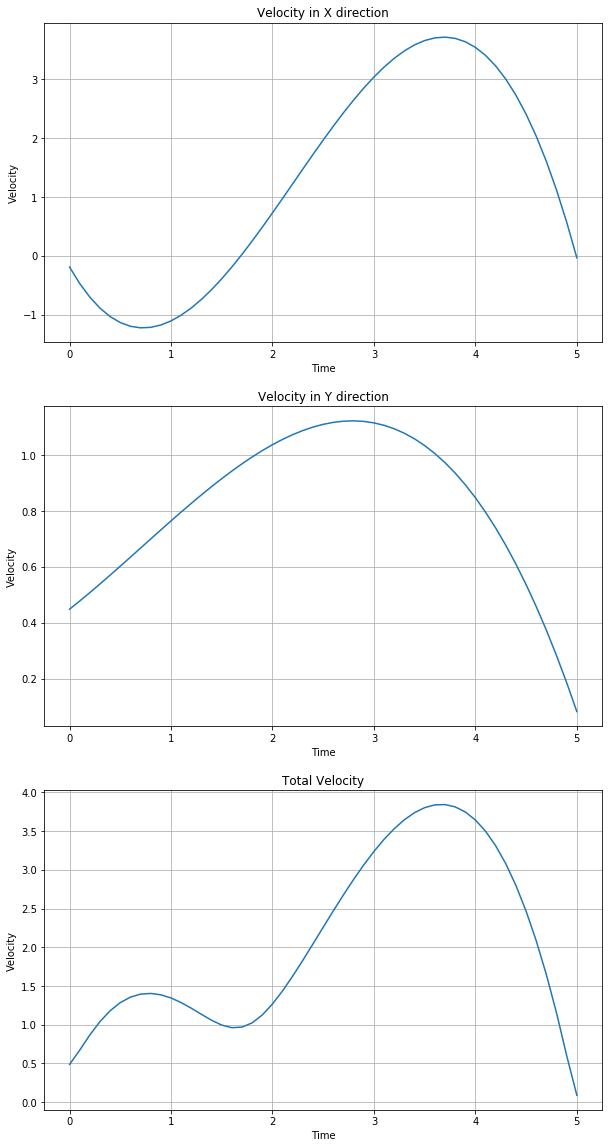

In [5]:
# Plotting Velocity profiles
ts = np.arange(0,5.1,0.1)
x_vel = []
y_vel = []
vel = []

for t in ts:
    tt = [4*t**3,3*t**2,2*t,1,0]
    xv = np.dot(x_coef,tt)
    yv = np.dot(y_coef,tt)
    x_vel.append(xv)
    y_vel.append(yv)
    v = np.sqrt(xv**2+yv**2)
    vel.append(v)


fig = plt.figure(figsize=(10,20))

plt.subplot(3, 1, 1)
plt.title("Velocity in X direction")
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.plot(ts,x_vel)
plt.grid()


plt.subplot(3, 1, 2)
plt.title("Velocity in Y direction")
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.plot(ts,y_vel)
plt.grid()


plt.subplot(3, 1, 3)
plt.title("Total Velocity")
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.plot(ts,vel)
plt.grid()


plt.show()


### Plotting the acceleration profiles.

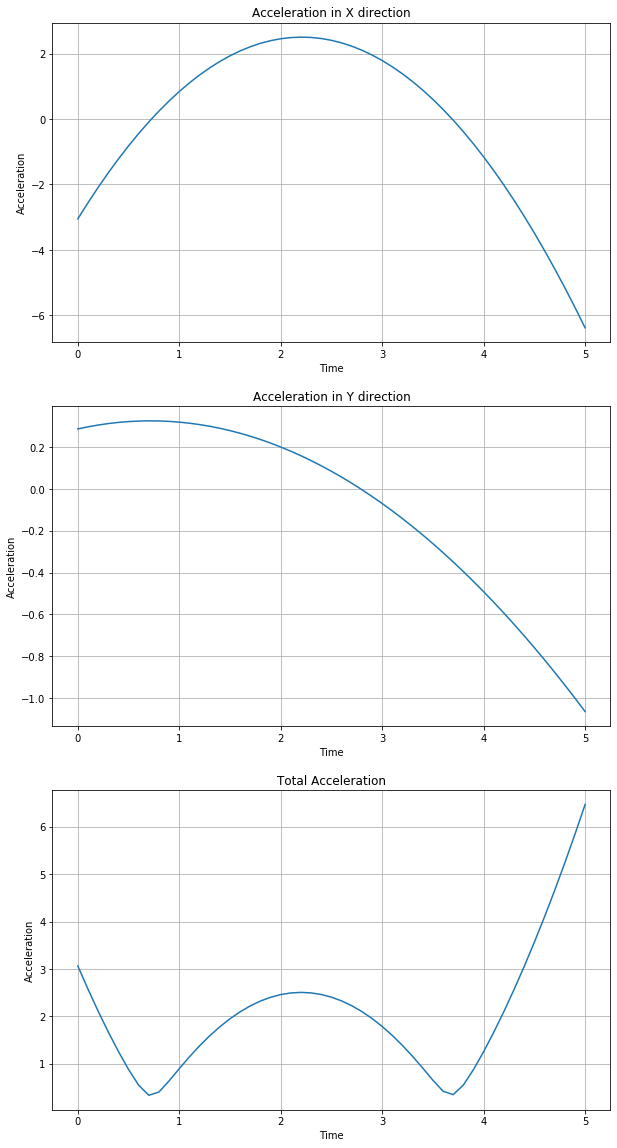

In [6]:
# Plotting Acceleration profiles
ts = np.arange(0,5.1,0.1)
x_vel = []
y_vel = []
vel = []

for t in ts:
    tt = [12*t**2,6*t,2,0,0]
    xv = np.dot(x_coef,tt)
    yv = np.dot(y_coef,tt)
    x_vel.append(xv)
    y_vel.append(yv)
    v = np.sqrt(xv**2+yv**2)
    vel.append(v)


fig = plt.figure(figsize=(10,20))

plt.subplot(3, 1, 1)
plt.title("Acceleration in X direction")
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.plot(ts,x_vel)
plt.grid()


plt.subplot(3, 1, 2)
plt.title("Acceleration in Y direction")
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.plot(ts,y_vel)
plt.grid()


plt.subplot(3, 1, 3)
plt.title("Total Acceleration")
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.plot(ts,vel)
plt.grid()


plt.show()

# Part 2
### Compute the trajectory for the desired motion profile using bernstein polynomial as basis function.
#### Assuming degree 5.
#### Here we assume that the robot reaches the cookie at t=2 and also stops there, for additional constraints while solving for the polynomial coefficients.

In [7]:
def traj_bern_coef(known_pos,known_vel):
    A = []
    b = []
    
    for p in known_pos:
        tau = p[0]/5
        A.append([(1-tau)**5,\
                  5*tau*((1-tau)**4),\
                  10*(tau**2)*((1-tau)**3),\
                  10*(tau**3)*((1-tau)**2),\
                  5*(tau**4)*(1-tau),\
                  (tau**5)])
        b.append(p[1])

    for p in known_vel:
        tau = p[0]/5
        A.append([-1*((1-tau)**4),\
                  (1-5*tau)*((1-tau)**3),\
                  2*tau*(2-5*tau)*((1-tau)**2),\
                  2*(3-5*tau)*(tau**2)*(1-tau),\
                  (4-5*tau)*(tau**3),\
                  (tau**4)])

        b.append(p[1])

    A = np.array(A)

    b = np.array(b)
    coef = np.linalg.pinv(A) @ b
    return coef

### Plotting the trajectory after calculating coeffients of the basis polynomials.

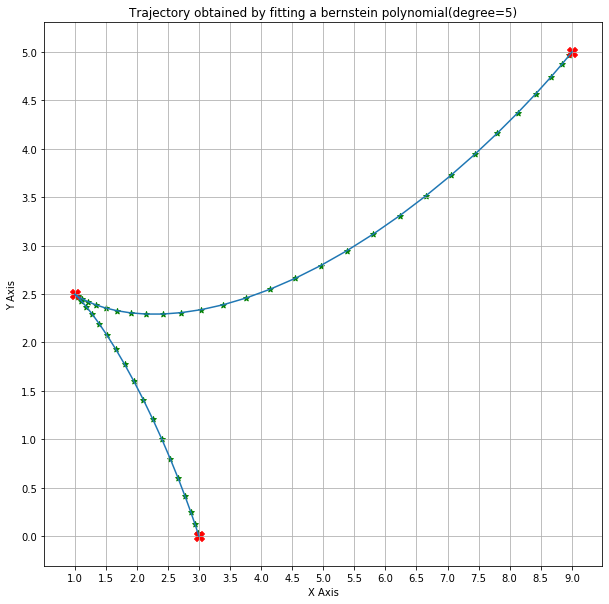

In [8]:
known_xpos = [(0,3),(5,9),(2,1)]
known_xvel = [(0,0),(5,0),(2,0)]

known_ypos = [(0,0),(5,5),(2,2.5)]
known_yvel = [(0,0),(5,0),(2,0)]
x_bern_coef = traj_bern_coef(known_xpos,known_xvel)
y_bern_coef = traj_bern_coef(known_ypos,known_yvel)

ts = np.arange(0,5.1,0.1)
x = []
y = []
for t in ts:
  tau = t/5 
  tt = [((1-tau)**5),\
                5*tau*((1-tau)**4),\
                10*(tau**2)*((1-tau)**3),\
                10*(tau**3)*((1-tau)**2),\
                5*(tau**4)*(1-tau),\
                (tau**5)]
  x.append(np.dot(x_bern_coef,tt))
  y.append(np.dot(y_bern_coef,tt))

xx = []
yy = []

known_pos = [0,2,5]
for t in known_pos:
  tau = t/5 
  tt = [((1-tau)**5),\
                5*tau*((1-tau)**4),\
                10*(tau**2)*((1-tau)**3),\
                10*(tau**3)*((1-tau)**2),\
                5*(tau**4)*(1-tau),\
                (tau**5)]
  xx.append(np.dot(x_bern_coef,tt))
  yy.append(np.dot(y_bern_coef,tt))


fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.set_xticks(np.arange(0, 10, 0.5))
ax.set_yticks(np.arange(0, 10, 0.5))
plt.scatter(x, y,marker='*',c='green')
plt.plot(x,y)
plt.scatter(xx,yy,marker = 'X',c = 'red',s=100)
plt.grid()
plt.title("Trajectory obtained by fitting a bernstein polynomial(degree=5)")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.show()

### Plotting the velocity profiles.

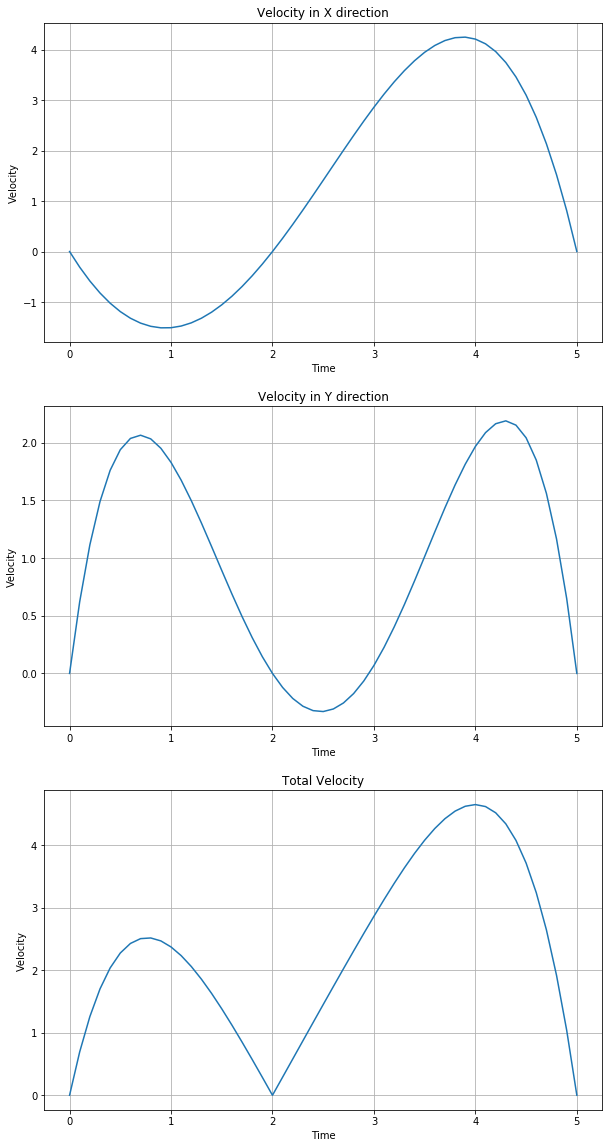

In [9]:
# Plotting Velocity profiles
ts = np.arange(0,5.1,0.1)
x_vel = []
y_vel = []
vel = []

for t in ts:
    tau  = t/5
    tt = [-1*((1-tau)**4),\
                (1-5*tau)*((1-tau)**3),\
                2*tau*(2-5*tau)*((1-tau)**2),\
                2*(3-5*tau)*(tau**2)*(1-tau),\
                (4-5*tau)*(tau**3),\
                (tau**4)]
    xv = np.dot(x_bern_coef,tt)
    yv = np.dot(y_bern_coef,tt)
    x_vel.append(xv)
    y_vel.append(yv)
    v = np.sqrt(xv**2+yv**2)
    vel.append(v)


fig = plt.figure(figsize=(10,20))

plt.subplot(3, 1, 1)
plt.title("Velocity in X direction")
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.plot(ts,x_vel)
plt.grid()


plt.subplot(3, 1, 2)
plt.title("Velocity in Y direction")
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.plot(ts,y_vel)
plt.grid()


plt.subplot(3, 1, 3)
plt.title("Total Velocity")
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.plot(ts,vel)
plt.grid()


plt.show()

### Plotting the acceleration profiles.

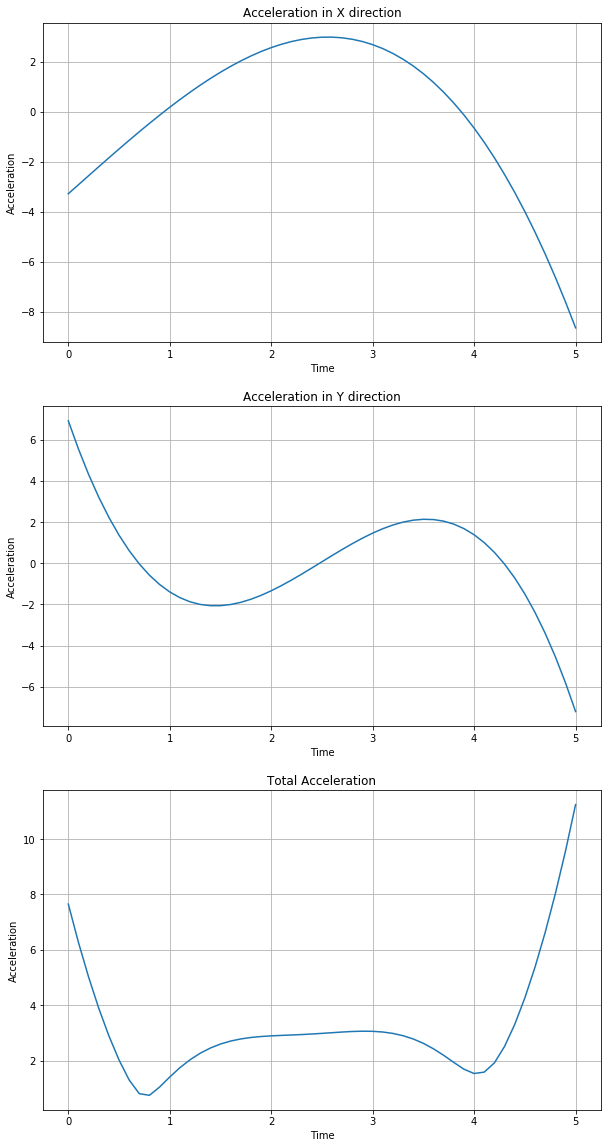

In [10]:
# Plotting Acceleration profiles
ts = np.arange(0,5.1,0.1)
x_acc = []
y_acc = []
acc = []

for t in ts:
    tau  = t/5
    tt =       [(0.8*((1-tau)**3)),\
                ( (-0.6*(1-5*tau)*((1-tau)**2)) - ((1-tau)**3) ),\
                ( 0.4*( ((2-10*tau)*((1-tau)**2)) - (2*tau*(2-5*tau)*(1-tau)) ))         ,\
                ( 0.4*tau*(20*(tau**2)-24*tau+6)),\
                ( 2.4*(tau**2)-4*(tau**3)),\
                ( 0.8*(tau**3)) ]
    xv = np.dot(x_bern_coef,tt)
    yv = np.dot(y_bern_coef,tt)
    x_acc.append(xv)
    y_acc.append(yv)
    v = np.sqrt(xv**2+yv**2)
    acc.append(v)


fig = plt.figure(figsize=(10,20))

plt.subplot(3, 1, 1)
plt.title("Acceleration in X direction")
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.plot(ts,x_acc)
plt.grid()


plt.subplot(3, 1, 2)
plt.title("Acceleration in Y direction")
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.plot(ts,y_acc)
plt.grid()


plt.subplot(3, 1, 3)
plt.title("Total Acceleration")
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.plot(ts,acc)
plt.grid()


plt.show()

# Part 3
## Objective:
Avoid the evil robot at (5,4) with radius = 2, considering the service robot radius = 1.

## Approaches: 
- Sample many trajectories considering extra waypoints away from the evil robot and pick the one which is least jerky (as we already know the position and radius of the evil robot).

- Apply A* algorithm after dividing the map into a grid of higher resolution for smoother trajectory.

`The cost function f = g + h where g is the distance between the robot's current position and the start point( cookie position: 1,2.5) , h is the heuristic function which we choose as the distance(euclidian norm) to the goal (9,5) from the current position. We run A* twice, first going from the initial position(3,0) to the cookie and then from the cookie to the goal, while avoiding the evil robot at (5,4).` 

- Apply convex optimization with constraints on the position.
Constraint: `(xr - xob)^2+ (yr - yob)^2 > (r+R)^2`
where, (xr,yr) is the robot position, (xob,yob) is the position of the obstacle and r,R denote the robot and obstacle radii respectively.

## BONUS
### Here we implement A* to get an optimal trajectory using the heuristics and cost function as described above.
#### The grid/maze is made by filling zeros at the position where the robot can traverse and ones at the positions where it can't move into.


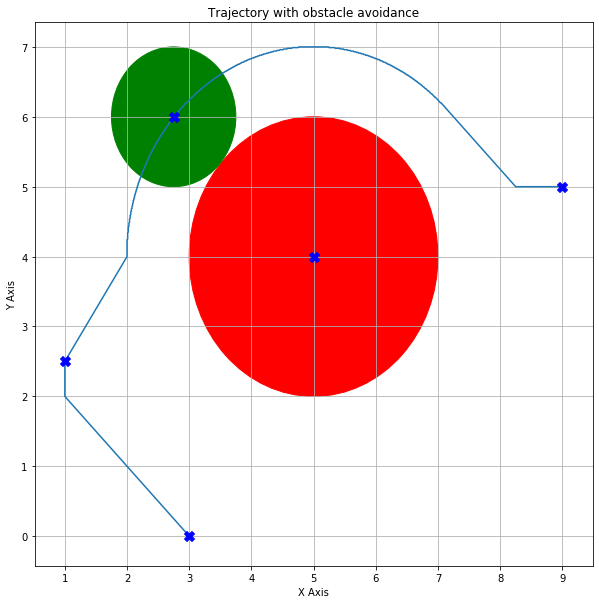

In [11]:
import numpy as  np
import matplotlib.pyplot as plt

class Node():
    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position
        self.g = 0
        self.h = 0
        self.f = 0
    def __eq__(self, other):
        return self.position == other.position


def astar(maze, start, end):
    openl = []
    closedl = []
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    openl.append(start_node)

    while len(openl) > 0:
        current_node = openl[0]
        current_index = 0
        for index, item in enumerate(openl):
            if item.f < current_node.f:
                current_node = item
                current_index = index
        openl.pop(current_index)
        closedl.append(current_node)

        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] 

        chs = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: 

            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue
            if maze[node_position[0]][node_position[1]] != 0:
                continue
            new_node = Node(current_node, node_position)
            chs.append(new_node)

        for ch in chs:
            for closed_ch in closedl:
                if ch == closed_ch:
                    continue
            ch.g = current_node.g + 1
            ch.h = ((ch.position[0] - end_node.position[0]) ** 2) + ((ch.position[1] - end_node.position[1]) ** 2)
            ch.f = ch.g + ch.h
            for open_node in openl:
                if ch == open_node and ch.g > open_node.g:
                    continue
            openl.append(ch)


def main():

    maze = []
    quant = 100

    for i in range(0, 15 * quant):
        temp = []
        for j in range(0, 15 * quant):
            temp.append(0)

        maze.append(temp)


    maze = np.array(maze)
    start = (2 * quant, int(4 * quant))
    end = (9 * quant, 5 * quant)

    for i in range(0, 15 * quant):
        for j in range(0, 15 * quant):
            if ((i-5 * quant)**2 + (j-4 * quant)**2)**(0.5) < 3 * quant:
                maze[i][j] = 1

    path1 = astar(maze, start, end)
    path1 = np.array(path1)

    start = (3 * quant, int(0 * quant))
    end = (1 * quant, 2.5 * quant)
    path2 = astar(maze, start, end)
    path2 = np.array(path2)

    path = np.vstack((path2, path1))
    fig, ax = plt.subplots(figsize=(10,10))
    circle = plt.Circle((5, 4), 2, color='r')
    circle2 = plt.Circle((2.75, 6), 1, color='green')

    ax.add_artist(circle)
    ax.add_artist(circle2)

    plt.plot(path[:, 0]/quant, path[:, 1]/quant)
    plt.scatter([5,1,3,9,2.75],[4,2.5,0,5,6],marker = 'X',c = 'blue',s=100,zorder=5)
    plt.grid(zorder=10)
    plt.title("Trajectory with obstacle avoidance")
    plt.xlabel("X Axis")
    plt.ylabel("Y Axis")
    plt.show()

main()